In [35]:
using Plots, BenchmarkTools, LinearAlgebra, SparseArrays, NAJ

In [41]:
function linear_least_square(x::AbstractVector{<:Real}, y::AbstractVector{<:Real})
    @assert length(x) == length(y)
    xsum = sum(x)
    ysum = sum(y)
    xysum = (x .* y) |> sum
    xsqsum = (x .* x) |> sum
    N = length(x)
    return ((N*xysum-xsum * ysum)/(N*xsqsum - xsum^2), (xsqsum * ysum - xysum * xsum)/(N*xsqsum - xsum^2))
end

function least_square_poly(x::AbstractVector{<:Real}, y::AbstractVector{<:Real}, order::Integer)
    @assert length(x) == length(y)
    @assert order ≥ 2 && order < length(x)-1
    X = [(xi)^i for xi in x, i in 0:order]
    a = inv(X'*X) *X' * y
    return a
end

least_square_poly (generic function with 1 method)

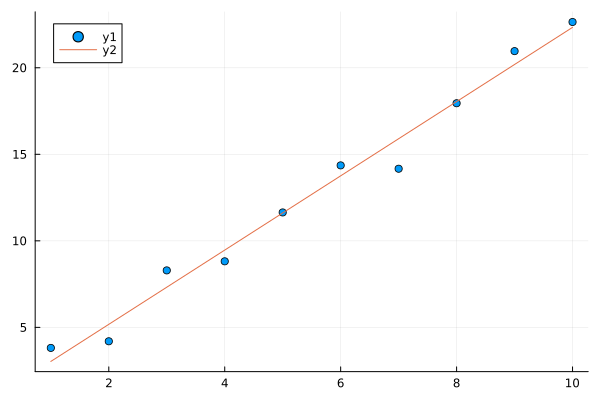

In [42]:
x = collect(1:10)
y = 2.0 .* x .+ 3 .* rand(10)
scatter(x, y)
a, b = linear_least_square(x, y)
plot!(x, a.*x .+ b)

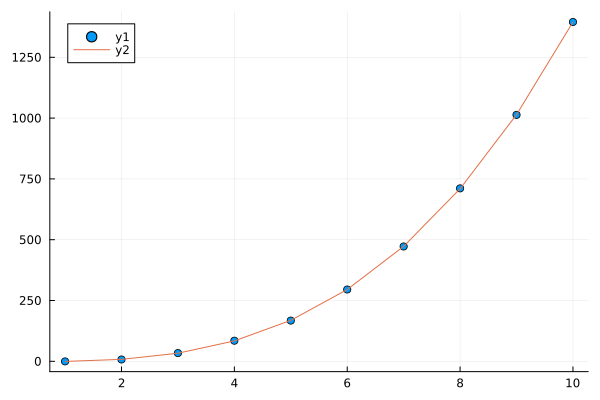

In [44]:
x = collect(1:10)
y = √2.0 .* x.^3 .-  2.0 .* x .+ 3 .* rand(10)
scatter(x, y)
coeffs = least_square_poly(x, y, 3)
p = SimplePolynomial(coeffs)
plot!(x, p.(x))

In [40]:
heatmap(A, aspect_ratio=:equal)

UndefVarError: UndefVarError: `A` not defined